In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# PART 1 - DATA UNDERSTANDING

In [2]:
# Import House Price Dataset
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv")

In [3]:
# Take a quick look at the data
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
# Look at the Shape of the data
print(df.shape)

(1460, 81)


The dataset has 1460 observations and 81 different features.

In [5]:
# View Type of each feature
pd.set_option('display.max_rows',None)
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [6]:
# View number of missing values for each feature
print(df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

From the above, we can see that there are 19 variables that have missing values. Some, such as PoolQC, Fence, and MiscFeature have large amounts of missing values, but others, like Electrical, only have 1. We will handle those missing values in the Pre-Processing step of the EDA.

In [7]:
# Basic statistics for a numeric feature
print(df['TotRmsAbvGrd'].describe())

count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64


The numeric variable "TotRmsAbvGrd" has no missing values (1,460 observations). Shown above are basic statistics for this variable in the dataset. The same could be done for any other variables in the dataset. The mean rooms in these properties is 6.5, with a median of 6.

In [8]:
#Basic Stats for Another numeric variable
print(df["1stFlrSF"].describe())


count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64


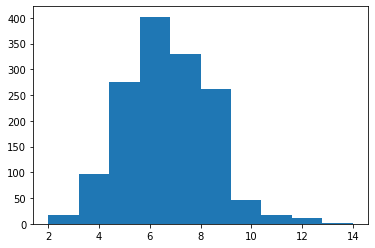

In [9]:
# Looking at the distribution of a numeric variable (Total Rooms Above Ground)
plt.hist(df['TotRmsAbvGrd'])
plt.show()

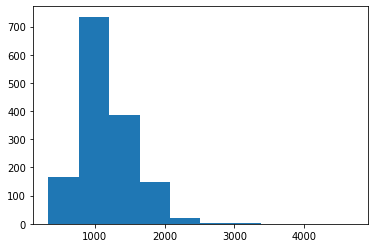

In [10]:
# Histogram of 1st floor square footage
plt.hist(df['1stFlrSF'])
plt.show()

In [11]:
# Correlation between the two numeric variables
print(df["1stFlrSF"].corr(df["TotRmsAbvGrd"]))

0.40951597886683205


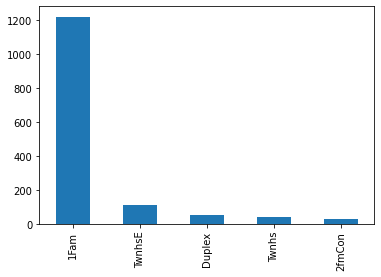

In [12]:
# Looking at the distribution of a categorical variable
df['BldgType'].value_counts().plot(kind="bar")
plt.show()

From the above, we can see that the far majority of the house types in the dataset are single family homes.

In [13]:
#Group the data by the Categorical Variable (Bldg Type)
grouped_df = df.groupby('BldgType')['1stFlrSF'].mean()
print(grouped_df)

BldgType
1Fam      1175.183607
2fmCon    1041.516129
Duplex    1325.615385
Twnhs      763.511628
TwnhsE    1137.377193
Name: 1stFlrSF, dtype: float64


The townhouse properties seem to be the smallest on average while the duplex properties have the highest mean square footage in the database.

In [14]:
#Do the same for the other numeric variable of interest
grouped_df_2 = df.groupby('BldgType')['TotRmsAbvGrd'].mean()
print(grouped_df_2)

BldgType
1Fam      6.603279
2fmCon    7.225806
Duplex    7.692308
Twnhs     5.558140
TwnhsE    5.236842
Name: TotRmsAbvGrd, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

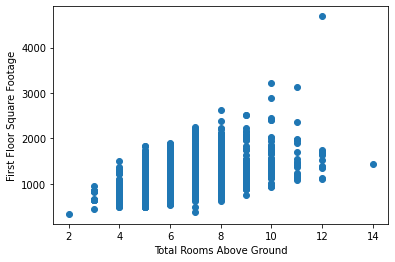

In [15]:
plt.scatter(df['TotRmsAbvGrd'],df['1stFlrSF'])
plt.xlabel("Total Rooms Above Ground")
plt.ylabel("First Floor Square Footage")
plt.show

From the graph, it looks as though there is a slight positive correlation between total rooms above ground and first floor square footage.

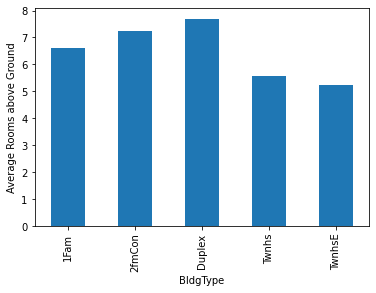

In [16]:
df_grouped = df.groupby('BldgType')
df_grouped = df_grouped['TotRmsAbvGrd'].mean()
df_grouped.plot(kind='bar')
plt.ylabel('Average Rooms above Ground')
plt.show()

Not surprisingly, the duplex looks to have the highest average number of rooms above ground compared to the other building types.

In [17]:
# Show the relationship between building type, total rooms above ground, and 1st floor square footage
pivot_table = df.pivot_table(index='BldgType', columns='TotRmsAbvGrd', values='1stFlrSF', aggfunc='mean')
print(pivot_table)

TotRmsAbvGrd     2           3           4            5            6   \
BldgType                                                                
1Fam          334.0  721.500000  863.507463  1024.389908  1133.304734   
2fmCon          NaN         NaN  936.000000   929.750000   975.500000   
Duplex          NaN         NaN  983.800000   944.000000  1150.400000   
Twnhs           NaN  630.000000  542.333333   705.909091   829.666667   
TwnhsE          NaN  799.555556  864.857143  1187.000000  1244.314286   

TotRmsAbvGrd           7            8            9            10           11  \
BldgType                                                                        
1Fam          1250.946488  1205.975758  1369.897059  1602.611111  1650.588235   
2fmCon        1050.428571   884.000000  1017.000000  1378.666667  1246.000000   
Duplex                NaN  1442.700000  1669.000000  1556.000000          NaN   
Twnhs          847.400000          NaN          NaN          NaN          NaN   
Tw

There seems to be a trend that as the number of rooms increases, so does the mean value of first floor square footage.

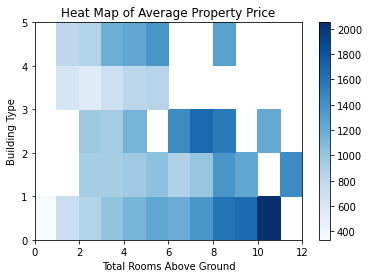

In [18]:
# The pivot table can be shown graphically through a heat map.
plt.pcolor(pivot_table, cmap='Blues')
plt.colorbar()
plt.xlabel("Total Rooms Above Ground")
plt.ylabel("Building Type")
plt.title("Heat Map of Average Property Price")
plt.show()

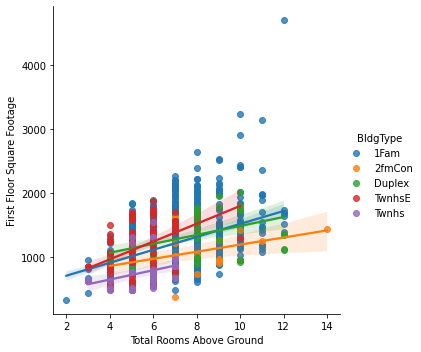

In [19]:
sns.lmplot(x="TotRmsAbvGrd",y="1stFlrSF",hue = "BldgType",data = df)
plt.xlabel("Total Rooms Above Ground")
plt.ylabel("First Floor Square Footage")
plt.show()

This graph is a little busy with five different colors of points, but it does a good job of showing the relationship between total rooms above ground and square footage of each building type. From the above, Twnhs seems to be the smallest.

# Part 2: Data Preprocessing

In [20]:
# Let's copy the original DataFrame
df_preprocessed = df.copy()

In [21]:
# We need to handle the missing values first.
print(df_preprocessed.isnull().sum() *100 /len(df_preprocessed))

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [22]:
# For the variables with more than 60% of the data missing, we will jut get rid of the columns
df_preprocessed.drop(["Alley","PoolQC","Fence","MiscFeature","FireplaceQu"], axis = 1,inplace = True)

In [23]:
#Check that the columns were dropped
print(df_preprocessed.isnull().sum() *100 /len(df_preprocessed))

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [24]:
#Replace missing values for columns with significant amounts of missing values with the median of the column.
df_preprocessed['LotFrontage'].fillna(df_preprocessed['LotFrontage'].median(),inplace = True)

In [25]:
# Check that there are no missing values in "LotFrontage"
df_preprocessed["LotFrontage"].isnull().sum()

0

In [26]:
# The rest of the missing values are 5% or less of the total observations, so we can drop those rows with missing values.
df_preprocessed.dropna(inplace=True)

In [27]:
# Now we check that there are no more missing values in the data.
print(df_preprocessed.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [28]:
df_preprocessed.shape

(1338, 76)

In [29]:
df_no_na = df_preprocessed.copy()

By dropping rows, we lost 122 obersvations of data. Not ideal, but we got this by following the rules from the reading assigned for class.

In [30]:
print(df_no_na.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0    

In [31]:
# Let's choose the columns 
df_kept_columns = df_preprocessed[["LotArea","Utilities","LotConfig","Neighborhood","BldgType","OverallCond","YearBuilt","CentralAir",
                                   "1stFlrSF","FullBath","HalfBath","TotRmsAbvGrd","GarageType","PoolArea","SaleCondition","SalePrice"]]

I chose these variables to be used in the model because they logically contribute to helping determine the sale price. Some of the variables I chose to get rid of because they either do not help contribute to determining sale price, or because they overlap with other variables. This multicolinearity in the model would just overcomplicate the model for no reason so I decided to get rid of those variables.

In [32]:
# Encode Categorical Variables
df_preprocessed_again = pd.get_dummies(df_kept_columns, columns=["Utilities","LotConfig","Neighborhood","BldgType","OverallCond",
                                                                 "YearBuilt","CentralAir", "GarageType","SaleCondition"],prefix=["Utilities",
                                                                "LotConfig","Neighborhood","BldgType","OverallCond",
                                                                 "YearBuilt","CentralAir", "GarageType","SaleCondition"])

In [33]:
# Check that it worked
print(df_preprocessed_again.head())

   LotArea  1stFlrSF  FullBath  HalfBath  TotRmsAbvGrd  PoolArea  SalePrice  \
0     8450       856         2         1             8         0     208500   
1     9600      1262         2         0             6         0     181500   
2    11250       920         2         1             6         0     223500   
3     9550       961         1         0             7         0     140000   
4    14260      1145         2         1             9         0     250000   

   Utilities_AllPub  Utilities_NoSeWa  LotConfig_Corner  ...  \
0                 1                 0                 0  ...   
1                 1                 0                 0  ...   
2                 1                 0                 0  ...   
3                 1                 0                 1  ...   
4                 1                 0                 0  ...   

   GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  \
0                   0                   0                   0   
1         

Below are some examples of scaling and transformations we could use to make our model better. Since we are not actually creating a model yet, we do not know which transformations will help create a model that will perform best.

In [38]:
# Box-Cox Transformation of 1stFlrSF

from scipy.stats import boxcox

df_preprocessed_again['1stFlrSF_transformed_boxcox'], lambda_ = boxcox(df_preprocessed_again['1stFlrSF'])

In [39]:
# Binning 1stFlrSF

from sklearn.preprocessing import KBinsDiscretizer
binned = KBinsDiscretizer(n_bins=8, encode='ordinal')
df_preprocessed_again['1stFlrSF_binned'] = binned.fit_transform(df_preprocessed_again[['1stFlrSF']])

In [40]:
# Min-Max Scaling to 1stFlrSF
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_preprocessed_again['1stFlrSF_scaled_minmax'] = scaler.fit_transform(df_preprocessed_again[['1stFlrSF']])

These are just three examples of different transformations that we could create from a single variable to help improve the accuracy of the model we create to estimate the sale price of a property. Without actually testing models, we will not know which, if any, of these models actually improve the accuracy of our model.

#Part 3: Post Processing

In [34]:
# Check for Colinearity
df_preprocessed_again.corr()

,LotArea,1stFlrSF,FullBath,HalfBath,TotRmsAbvGrd,PoolArea,SalePrice,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
LotArea,1.000000,0.288502,0.115727,0.006052,0.185654,0.077050,0.254757,-0.009710,0.009710,0.043932,...,-0.003165,0.035809,0.009517,-0.138356,-0.025722,-0.006739,-0.001475,-0.013141,0.006441,0.020112
1stFlrSF,0.288502,1.000000,0.367498,-0.146494,0.393786,0.134879,0.604714,-0.011872,0.011872,0.035860,...,0.053097,-0.036127,-0.015535,-0.348153,-0.017040,-0.029735,0.034376,0.018606,-0.164646,0.219781
FullBath,0.115727,0.367498,1.000000,0.134953,0.547592,0.050780,0.569313,0.028754,-0.028754,-0.026232,...,-0.033862,0.229989,-0.057319,-0.346327,-0.075117,-0.028754,-0.057319,-0.005736,-0.119825,0.243435
HalfBath,0.006052,-0.146494,0.134953,1.000000,0.357991,0.020482,0.258175,0.021859,-0.021859,0.002715,...,-0.070864,0.247803,0.024258,-0.158104,-0.058316,0.032404,0.044814,-0.049577,0.008840,0.044940
TotRmsAbvGrd,0.185654,0.393786,0.547592,0.357991,1.000000,0.088279,0.551821,-0.007766,0.007766,0.051038,...,-0.005786,0.280883,-0.025177,-0.178348,-0.062137,0.007766,0.020593,0.031092,-0.088512,0.151861
PoolArea,0.077050,0.134879,0.050780,0.020482,0.088279,1.000000,0.091881,0.001963,-0.001963,0.037489,...,-0.008614,-0.018693,-0.005205,-0.023876,0.058712,-0.001963,0.177072,-0.008841,-0.074136,0.007405
SalePrice,0.254757,0.604714,0.569313,0.258175,0.551821,0.091881,1.000000,0.017079,-0.017079,0.002338,...,-0.039849,0.231545,-0.066910,-0.399803,-0.106836,-0.021066,-0.007775,-0.058031,-0.171833,0.348766
Utilities_AllPub,-0.009710,-0.011872,0.028754,0.021859,-0.007766,0.001963,0.017079,1.000000,-1.000000,0.012916,...,-0.227866,0.007123,0.001983,0.016877,-0.104349,0.000748,0.001983,0.003369,0.059403,0.008584
Utilities_NoSeWa,0.009710,0.011872,-0.028754,-0.021859,0.007766,-0.001963,-0.017079,-1.000000,1.000000,-0.012916,...,0.227866,-0.007123,-0.001983,-0.016877,0.104349,-0.000748,-0.001983,-0.003369,-0.059403,-0.008584
LotConfig_Corner,0.043932,0.035860,-0.026232,0.002715,0.051038,0.037489,0.002338,0.012916,-0.012916,1.000000,...,0.057831,-0.003974,0.019410,0.037716,0.065639,-0.012916,-0.034249,0.037528,-0.027144,-0.026306


This chart does not do a great job at showing if any of the variables are super correlated since there are so many numbers on the chart. A better idea would be to show if there is multicolinearity through a graph such as a heatmap.

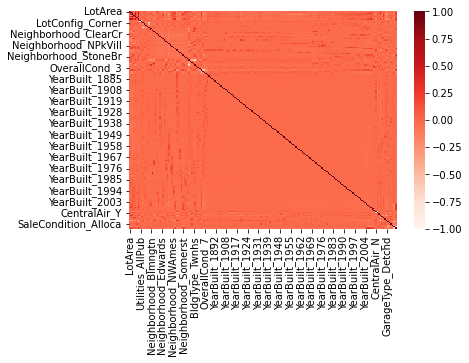

In [37]:
dataplot = sns.heatmap(df_preprocessed_again.corr(), cmap="Reds")


The scale on the right side shows us that there are really no multicolinearity issues with the dataset as most of the values for correlation seem to be right around 0.00-0.25. There are a couople values in the top left of the heat map that seem to have stronger correlations, but it does not seem concerning.

Now that we have done most of the EDA, we would next need to finish the EDA with the "Class Imbalance" step, and then from there we would choose our model to help estimate the sale prices of these properties.